# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import (
    cross_val_score,
    KFold,
    cross_val_predict,
    GridSearchCV,
)
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    f1_score,
    recall_score,
    classification_report,
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def train_test_validation_split(
    x: pd.DataFrame,
    y: pd.Series,
    train_size: float = 0.7,
    test_size: float = 0.15,
    validation_size: float = 0.15,
) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.Series, pd.Series, pd.Series]:
    """Split data into fixed train, test and validation subsets."""
    x_train, x_test, y_train, y_test = train_test_split(
        x,
        y,
        train_size=train_size,
        test_size=test_size + validation_size,
        random_state=42,
    )
    x_test, x_validation, y_test, y_validation = train_test_split(
        x_test,
        y_test,
        train_size=test_size / (test_size + validation_size),
        test_size=validation_size / (test_size + validation_size),
        random_state=42,
    )
    return x_train, x_test, x_validation, y_train, y_test, y_validation

In [ ]:
df: pd.DataFrame = pd.read_csv("../Vectores_Caracteristicos_Mariposas.csv")
x: pd.DataFrame = df.drop("Etiqueta", axis=1)
y: pd.Series = df["Etiqueta"].astype(int)

(
    x_train,
    x_test,
    x_validation,
    y_train,
    y_test,
    y_validation,
) = train_test_validation_split(x, y)

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(x_train, y_train)

predictions = dt.predict(x_test)

report = classification_report(y_test, predictions)
print(report)

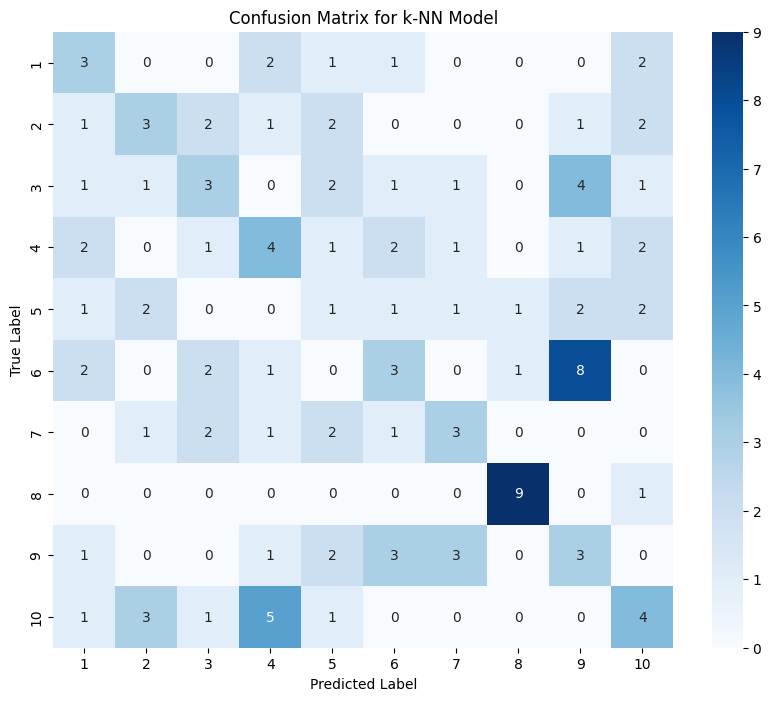

In [33]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=list(range(1, 11)), 
            yticklabels=list(range(1, 11)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for k-NN Model')
plt.show()